<a href="https://colab.research.google.com/github/CautePag/UTSRekayasaFitur/blob/main/UTS_Rekayasa_fitur_Raden_Rivanda_Oktariandi(14012200235).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install google-play-scraper
from google_play_scraper import reviews, Sort
import csv

# Ambil ulasan aplikasi DJP
result, _ = reviews(
    'id.go.pajak.djp',      # package name benar
    lang='id',
    country='id',
    sort=Sort.NEWEST,
    count=500,
    filter_score_with=None
)

filename = 'ulasan_google_play.csv'

# Tulis hasil ke CSV
with open(filename, 'w', newline='', encoding='utf-8') as f:
    writer = csv.DictWriter(f, fieldnames=['userName', 'score', 'at', 'content'])
    writer.writeheader()

    for r in result:
        writer.writerow({
            'userName': r.get('userName', ''),
            'score': r.get('score', ''),
            'at': r.get('at').strftime("%Y-%m-%d %H:%M:%S") if r.get('at') else '',
            'content': r.get('content', '')
        })

print("✔ 500 ulasan berhasil disimpan ke:", filename)

✔ 500 ulasan berhasil disimpan ke: ulasan_google_play.csv


         userName  score                   at  \
0  Gina Hidayanti      1  2025-12-06 12:37:06   
1        Erwin Iu      1  2025-12-06 11:28:20   
2  Blackjack 1997      1  2025-12-06 05:32:34   
3           Libra      1  2025-12-06 02:03:33   
4    tara somplak      1  2025-12-05 22:23:18   

                                             content  
0  ini aplikasi udah rampung? kalau udah rampung ...  
1                     lupa pasword bagaimna caranya?  
2   ribet heyy , dana miliyaran applikasi buruk rupa  
3                             tak bisa loginn tololl  
4  mohon untuk di permudah cara merubah pasword y...  
✔ Menggunakan kolom komentar: content


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


         userName  score                   at  \
0  Gina Hidayanti      1  2025-12-06 12:37:06   
1        Erwin Iu      1  2025-12-06 11:28:20   
2  Blackjack 1997      1  2025-12-06 05:32:34   
3           Libra      1  2025-12-06 02:03:33   
4    tara somplak      1  2025-12-05 22:23:18   

                                             content  \
0  ini aplikasi udah rampung? kalau udah rampung ...   
1                     lupa pasword bagaimna caranya?   
2   ribet heyy , dana miliyaran applikasi buruk rupa   
3                             tak bisa loginn tololl   
4  mohon untuk di permudah cara merubah pasword y...   

                                       clean_comment sentiment  
0  aplikasi udah rampung udah rampung makan biaya...   Neutral  
1                              lupa pasword bagaimna   Neutral  
2     ribet heyy dana miliyaran applikasi buruk rupa   Neutral  
3                                      loginn tololl   Neutral  
4  mohon permudah merubah pasword yg lupa u

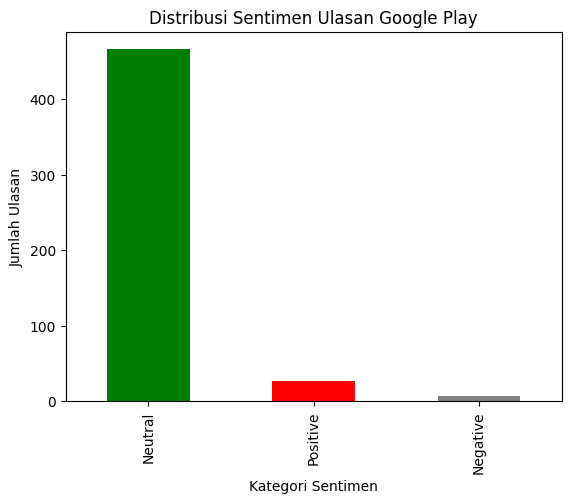

In [10]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import matplotlib.pyplot as plt

# Download resource NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Added to resolve LookupError

# Baca CSV
df = pd.read_csv("ulasan_google_play.csv")
print(df.head())

# Cari kolom komentar secara otomatis
possible_cols = ["comment", "ulasan", "review", "content", "body", "text"]

COMMENT_COLUMN = None
for col in possible_cols:
    if col in df.columns:
        COMMENT_COLUMN = col
        break

if COMMENT_COLUMN is None:
    raise ValueError(
        f"Tidak ditemukan kolom komentar. Kolom tersedia: {df.columns.tolist()}"
)

print(f"✔ Menggunakan kolom komentar: {COMMENT_COLUMN}")

# Fungsi bersihkan teks
def clean_text(text):
    text = str(text).lower()

    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)

    tokens = word_tokenize(text)

    stop_words = set(stopwords.words('english')).union(
        set(stopwords.words('indonesian'))
    )
    tokens = [word for word in tokens if word not in stop_words]

    return " ".join(tokens)

df['clean_comment'] = df[COMMENT_COLUMN].apply(clean_text)

# Fungsi sentimen TextBlob
def sentiment(text):
    if not text.strip():
        return "Neutral"

    polarity = TextBlob(text).sentiment.polarity

    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df['sentiment'] = df['clean_comment'].apply(sentiment)

# Hasil
print(df.head())
print(df['sentiment'].value_counts())

# Grafik aman (jumlah warna menyesuaikan jumlah kategori)
sent_count = df['sentiment'].value_counts()
colors = ['green', 'red', 'gray'][:len(sent_count)]

sent_count.plot(kind='bar', color=colors)
plt.title("Distribusi Sentimen Ulasan Google Play")
plt.xlabel("Kategori Sentimen")
plt.ylabel("Jumlah Ulasan")
plt.show()
